<a href="https://colab.research.google.com/github/marcelagomescorrea/bootcamp_alura/blob/main/Bootcamp_Alura_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados do Datasus (a partir de 2008)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.options.display.float_format = "{:.2f}".format

In [ ]:
pip install plotly==4.12.0

In [ ]:
# Importando Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Parte 01 - Aquisição e leitura de dados reais

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv',
                    encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=12,
                    engine='python', thousands='.', decimal=',', na_values='-')

dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,nan,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,30207

In [ ]:
dados['2008/Ago'].mean()

27800320.306666665

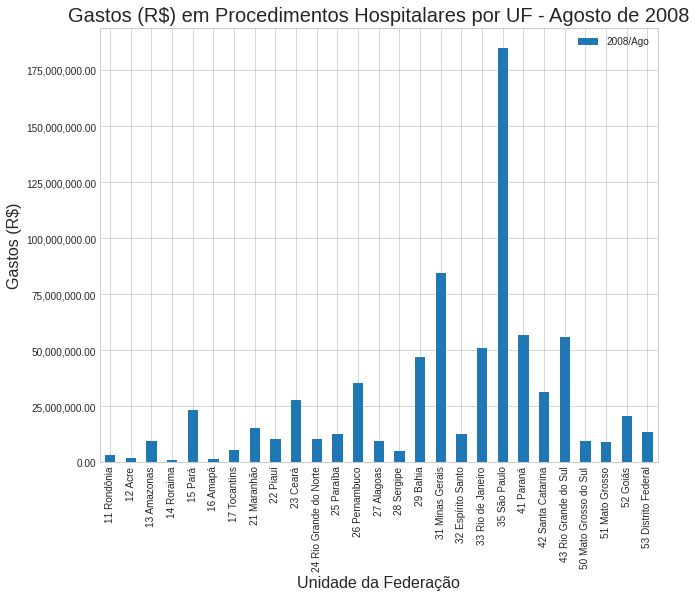

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = dados.plot(x = 'Unidade da Federação', y = '2008/Ago', kind='bar',
           figsize=(10,8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Unidade da Federação', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares por UF - Agosto de 2008', fontdict = {'fontsize' : 20})

plt.show()

## Desafios 1 e 2


*   Desafio 1 -> Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras 
*   Desafio 2 -> Faça a mesma análise realizada em aula, porém para o mês mais recente, no caso Agosto/2020.



Como a coluna do mês de Agosto de 2020 possui alguns valores nulos, vamos dropá-los antes de plotar nosso gráfico, mas vamos mantê-los no nosso dataset.

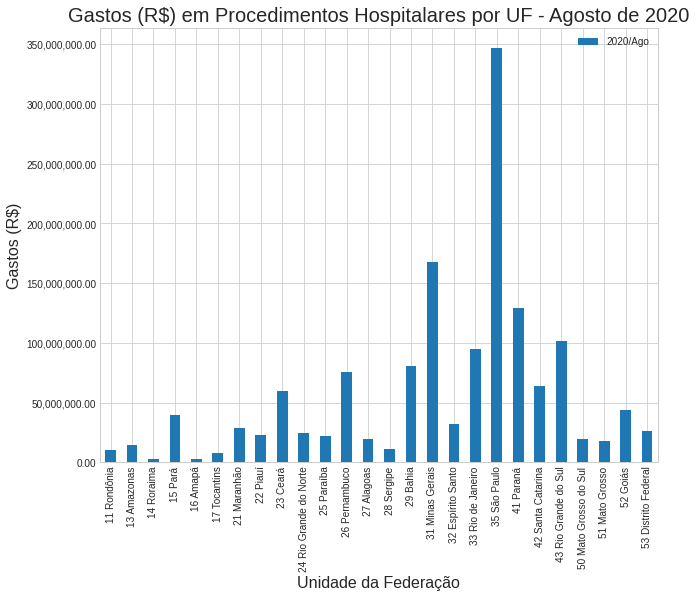

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = dados.dropna().plot(x = 'Unidade da Federação', y = '2020/Ago', kind='bar',
           figsize=(10,8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Unidade da Federação', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares por UF - Agosto de 2020', fontdict = {'fontsize' : 20})

plt.show()

In [ ]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,nan,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,30207

## Desafios 1 e 2 usando o Plotly

In [ ]:
# usando Plotly
fig = go.Figure()

fig.add_trace(go.Bar(x = dados['Unidade da Federação'],
                     y = dados['2008/Ago'],
                     name = 'Agosto/2008'))

fig.add_trace(go.Bar(x = dados['Unidade da Federação'],
                     y = dados['2020/Ago'],
                     name = 'Agosto/2020'))

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF - Agosto de 2020',
    xaxis_title_text = 'Unidades da Federação',
    xaxis={'categoryorder':'category ascending'},
    yaxis_title_text = 'Gastos (R$)',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)

fig.show()

# Parte 02 - Primeiras visualizações de dados

A partir de agora iremos utilizar os dados de acordo com o **mês do atendimento** e não do faturamento, que havíamos feito antes.

In [ ]:
dados2 = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv',
                    encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=12,
                    engine='python', thousands='.', decimal=',', na_values = '-')

dados2.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63
2,13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


Vamos tratar o nome das nossas colunas, transformando a abreviação dos meses em números.

In [ ]:
import re

rename_dict = {
    'Jan':'01',
    'Fev':'02',
    'Mar':'03',
    'Abr':'04',
    'Mai':'05',
    'Jun':'06',
    'Jul':'07',
    'Ago':'08',
    'Set':'09',
    'Out':'10',
    'Nov':'11',
    'Dez':'12',
}

def rename_month(month):
    pattern = re.compile(r'\b(' + '|'.join(rename_dict.keys()) + r')\b')
    return pattern.sub(lambda x: rename_dict[x.group()], month)


dados2.columns = list(map(rename_month, dados2.columns))

In [ ]:
dados2.columns

Index(['Unidade da Federação', '1992/03', '1992/04', '1993/05', '1993/12',
       '1994/01', '1994/02', '1994/05', '1994/08', '1994/11',
       ...
       '2019/12', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05',
       '2020/06', '2020/07', '2020/08', 'Total'],
      dtype='object', length=280)

In [ ]:
dados2.tail()

,Unidade da Federação,1992/03,1992/04,1993/05,1993/12,1994/01,1994/02,1994/05,1994/08,1994/11,1995/01,1995/03,1995/06,1995/08,1995/12,1996/02,1996/03,1996/08,1996/12,1997/02,1997/11,1998/02,1998/03,1998/07,1998/08,1998/09,1998/10,1998/12,1999/02,1999/03,1999/05,1999/07,1999/08,1999/09,1999/10,1999/11,1999/12,2000/01,2000/02,2000/03,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,Total
22,43 Rio Grande do Sul,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,11958647088.33
23,50 Mato Grosso do Sul,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2172157981.36
24,51 Mato Grosso,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2036923784.59
25,52 Goiás,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,36473617.92,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4657348958.66
26,53 Distrito Federal,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2429933198.76


In [ ]:
dados2.mean()

1992/03        40243.16
1992/04        11449.99
1993/05        34583.77
1993/12        68556.52
1994/01        39809.34
               ...     
2020/05     46769027.82
2020/06     45367349.74
2020/07     40717083.95
2020/08     19880851.12
Total     5993724452.01
Length: 279, dtype: float64

In [ ]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(279), object(1)
memory usage: 59.2+ KB


In [ ]:
dados2.describe()

,1992/03,1992/04,1993/05,1993/12,1994/01,1994/02,1994/05,1994/08,1994/11,1995/01,1995/03,1995/06,1995/08,1995/12,1996/02,1996/03,1996/08,1996/12,1997/02,1997/11,1998/02,1998/03,1998/07,1998/08,1998/09,1998/10,1998/12,1999/02,1999/03,1999/05,1999/07,1999/08,1999/09,1999/10,1999/11,1999/12,2000/01,2000/02,2000/03,2000/04,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,Total
count,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,5.00,5.00,3.00,3.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,26.00,27.00
mean,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,19904.67,24509.71,19442.14,10536.67,34523.06,14672.77,34569.76,37331.15,19904.67,38882.55,75358.43,16133.26,2750.47,859884.95,1675816.64,1398817.11,18977.88,26050.45,167713.68,149751.54,54437.07,54469.76,15220.67,80286.48,20502.61,167831.88,93218.69,8676.09,5776.25,2256.54,6768.10,...,44982552.14,46225259.58,48124741.88,44016901.84,46408157.62,43927647.26,42373621.49,45739245.03,41032262.53,46827789.99,47239172.40,48417052.85,46395470.88,48086014.64,49345477.29,45758563.30,49566746.37,46123498.40,43886096.76,47687458.50,44611528.07,47288709.35,48423567.04,51139897.77,47411368.59,51552077.60,50394646.23,49325792.18,51035126.81,47560486.81,45776962.72,49365504.99,45084524.48,45236027.39,40005678.92,46769027.82,45367349.74,40717083.95,19880851.12,5993724452.01
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6624.18,nan,nan,nan,nan,10411.74,7338.65,922.50,10744.26,...,58175274.05,60208008.37,63497043.49,56710314.78,60690288.24,56839876.94,55014426.00,59269217.98,53547379.58,60615321.14,60947262.29,62003517.93,59746338.72,61581707.51,63422341.58,58980269.22,64040556.09,59464319.37,56760458.05,61842215.77,57091413.99,60729021.43,62405602.25,65749545.42,60552099.50,65999947.68,64357372.21,62634426.60,65054555.98,60419931.36,58350827.23,63825806.17,57378788.07,58487564.07,52470681.18,61740606.78,60665540.70,56808984.40,28398050.32,8057775772.23
min,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,19904.67,24509.71,19442.14,10536.67,34523.06,14672.77,34569.76,37331.15,19904.67,38882.55,75358.43,16133.26,2750.47,859884.95,1675816.64,1398817.11,18977.88,26050.45,167713.68,149751.54,54437.07,54469.76,10536.67,80286.48,20502.61,167831.88,93218.69,1237.07,1283.84,1267.55,261.08,...,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2277493.49,2441325.03,2234388.36,2473008.49,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2383895.48,2199920.70,1163813.08,834187.31,291637984.75
25%,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,19904.67,24509.71,19442.14,10536.67,34523.06,14672.77,34569.76,37331.15,19904.67,38882.55,75358.43,16133.26,2750.47,859884.95,1675816.64,1398817.11,18977.88,26050.45,167713.68,149751.54,54437.07,54469.76,12878.67,80286.48,20502.61,167831.88,93218.69,2361.04,1309.80,1837.95,567.42,...,14613499.21,14899615.56,14732951.76,14643590.43,14775931.00,14089005.89,14054437.16,15064173.61,13194424.46,15456829.37,15249865.98,16056667.07,15364362.24,15880640.64,16193074.55,15350307.45,16517604.

In [ ]:
dados2[['Unidade da Federação', '2008/08', '2008/09']].head()

,Unidade da Federação,2008/08,2008/09
0,11 Rondônia,2938286.29,2843930.91
1,12 Acre,1886871.84,2084884.80
2,13 Amazonas,8331763.97,8148089.92
3,14 Roraima,1045291.11,1003740.89
4,15 Pará,23259148.28,23667690.01


In [ ]:
colunas_usaveis = dados2.dropna(axis=1).mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/08',
 '2007/09',
 '2007/10',
 '2007/11',
 '2007/12',
 '2008/01',
 '2008/02',
 '2008/03',
 '2008/04',
 '2008/05',
 '2008/06',
 '2008/07',
 '2008/08',
 '2008/09',
 '2008/10',
 '2008/11',
 '2008/12',
 '2009/01',
 '2009/02',
 '2009/03',
 '2009/04',
 '2009/05',
 '2009/06',
 '2009/07',
 '2009/08',
 '2009/09',
 '2009/10',
 '2009/11',
 '2009/12',
 '2010/01',
 '2010/02',
 '2010/03',
 '2010/04',
 '2010/05',
 '2010/06',
 '2010/07',
 '2010/08',
 '2010/09',
 '2010/10',
 '2010/11',
 '2010/12',
 '2011/01',
 '2011/02',
 '2011/03',
 '2011/04',
 '2011/05',
 '2011/06',
 '2011/07',
 '2011/08',
 '2011/09',
 '2011/10',
 '2011/11',
 '2011/12',
 '2012/01',
 '2012/02',
 '2012/03',
 '2012/04',
 '2012/05',
 '2012/06',
 '2012/07',
 '2012/08',
 '2012/09',
 '2012/10',
 '2012/11',
 '2012/12',
 '2013/01',
 '2013/02',
 '2013/03',
 '2013/04',
 '2013/05',
 '2013/06',
 '2013/07',
 '2013/08',
 '2013/09',
 '2013/10',
 '2013/11',
 '2013/12',
 '2014/01',
 '2014/02',
 '2014/03',
 '2014/04',
 '2

In [ ]:
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478

In [ ]:
usaveis['2019/08'].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/08, dtype: float64

In [ ]:
usaveis.loc['12 Acre']

2007/08       10470.07
2007/09       14001.71
2007/10       86200.85
2007/11      301323.68
2007/12      769612.36
              ...     
2020/04     2472063.08
2020/05     2383895.48
2020/06     2199920.70
2020/07     1163813.08
Total     420668039.63
Name: 12 Acre, Length: 157, dtype: float64

In [ ]:
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/08,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/09,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/10,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/11,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/12,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [ ]:
usaveis = usaveis.drop('Total', axis=1)
usaveis.tail()

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964528.31,69933577.14,66486835.62,69108367.47,67570770.09,70074754.73,70884009.17,65079794.92,66556015.62,66097030.85,...,83188379.66,95149948.63,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,10257782.00,10167827.24,9602843.49,10272466.74,10814111.53,10371654.90,9140959.80,9771575.46,9648706.17,11784290.10,11240770.37,11155445.90,11796784.62,11956687.54,12420336.71,11489768.73,11698487.88,11286787.17,10814729.24,11570718.38,10920760.16,13204085.81,11711475.20,12671896.78,12584046.80,11808910.05,12917152.45,12429678.06,12526681.04,12305360.94,...,15646601.91,18212081.17,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,...,15835149.88,16543674.21,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,74063828.22,18149374.27,20992213.03,21049477.30,19162546.79,20332533.92,20008563.15,21041071.33,21396098.51,20610541.50,19912347.49,19343787.54,20817880.66,20201261.16,24174119.21,22943952.73,23781906.69,23668981.57,23293723.39,25835544.14,25151192.72,24729933.86,24090130.18,23172

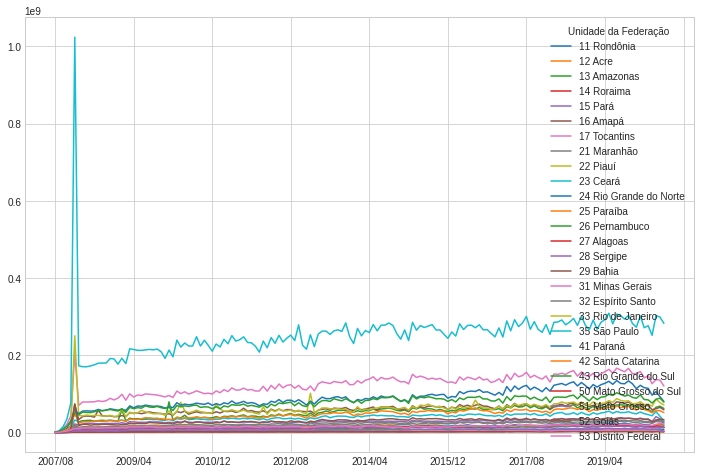

In [ ]:
usaveis.T.plot(
    figsize=(12,8))

## Desafios

* Desafio 01 -> Reposicionar a legenda do gráfico em uma posição mais adequada
* Desafio 02 -> Plotar o gráfico de linha com apenas 5 estados de sua preferência

### Desafio 1

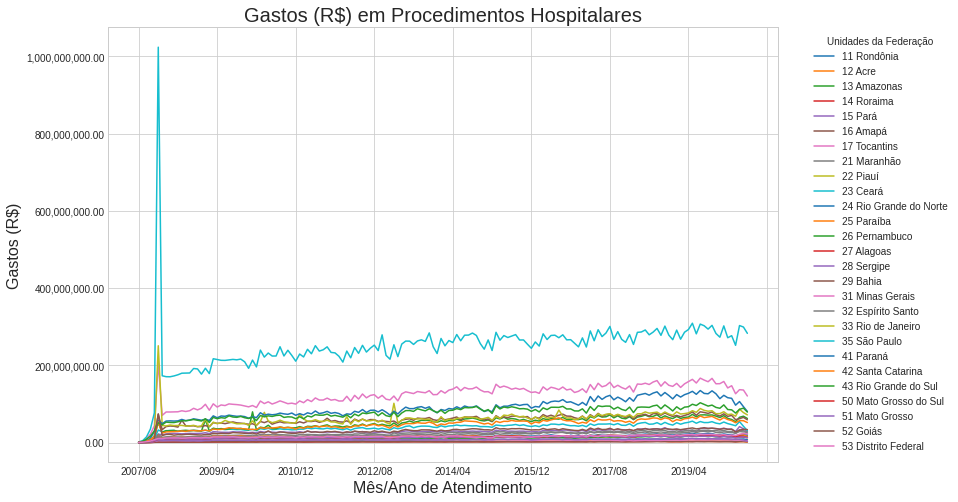

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = usaveis.T.plot(figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Unidades da Federação')
plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Mês/Ano de Atendimento', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares', fontdict = {'fontsize' : 20})

plt.show()

In [ ]:
ufs_maiores = usaveis.T.sum().sort_values(ascending=False)[:5].index
ufs_maiores

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro'],
      dtype='object', name='Unidade da Federação')

### Desafio 2

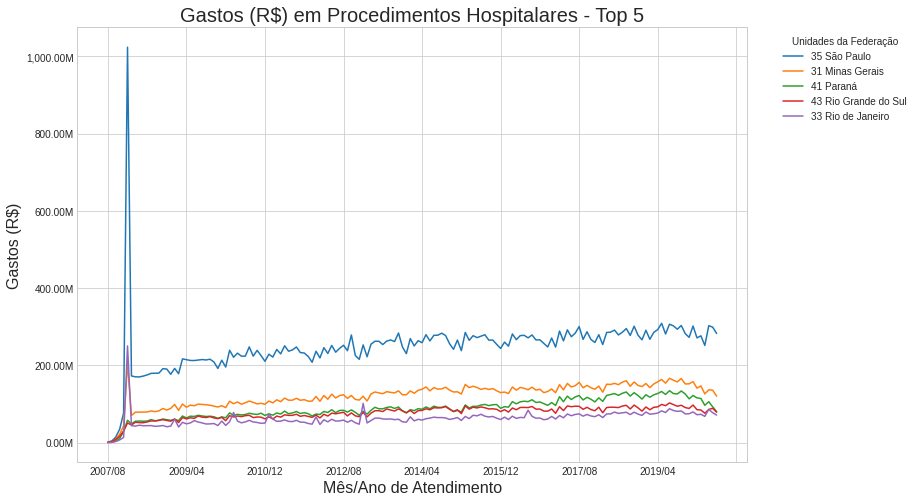

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = usaveis.loc[ufs_maiores].T.plot(figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Unidades da Federação')
plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Mês/Ano de Atendimento', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares - Top 5', fontdict = {'fontsize' : 20})

plt.show()

## Desafios usando Plotly

In [ ]:
aux = usaveis.reset_index()
top_5 = aux[aux['Unidade da Federação'].isin(ufs_maiores)]
top_5

,Unidade da Federação,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
16,31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
18,33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,...,64524506.56,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
19,35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
20,41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,678499

### Plotly

In [ ]:
# usando Plotly
fig = go.Figure()

for uf in top_5['Unidade da Federação'].values:
    line =  top_5[top_5['Unidade da Federação'] == uf]
    gastos = line.iloc[:,1:].values[0]

    fig.add_trace(go.Scatter(x = top_5.columns[1:].values,
                        y = gastos,
                        name = uf))

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    legend_title_text='UFs Top 5',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

### Pandas integrado ao Plotly

In [ ]:
fig = usaveis.loc[ufs_maiores].T.plot(backend="plotly")

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

# Parte 03 - Manipulação de dados

In [ ]:
def get_usaveis(dados):
    colunas_usaveis = dados.dropna(axis = 1).mean().index.tolist()
    colunas_usaveis.insert(0, "Unidade da Federação")

    usaveis = dados[colunas_usaveis]
    usaveis = usaveis.set_index("Unidade da Federação")
    
    return usaveis

In [ ]:
def get_ordenados(dados):
    ordenado_por_total = dados.sort_values(by='Total', ascending=False)
    ordenado_por_total = ordenado_por_total.drop('Total', axis=1)

    return ordenado_por_total.iloc[:,7:]

In [ ]:
usaveis = get_usaveis(dados2)
usaveis = usaveis.drop('Total', axis=1)

In [ ]:
usaveis[:7]

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.

In [ ]:
usaveis[:7].T.plot(backend="plotly")

In [ ]:
np.random.seed(687942)
usaveis.sample(7)

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,24900816.95,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,18225302.41,20227425.64,18861445.44,18766514.59,20028976.78,18531262.60,18122577.13,18169461.87,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22616858.75,19926336.21,22290820.67,20445273.59,19380375.16,21147377.76,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137087.77,23073307.72,23437265.73,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6022437.54,5984209.71,6640964.62,6461045.18,6622397.84,6302602.71,6330494.80,66

In [ ]:
usaveis.sample(7).T.plot(backend="plotly")

In [ ]:
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head()

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478

In [ ]:
ordenado_por_total = get_ordenados(usaveis)
ordenado_por_total.head()

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,236807488.84,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,74994292.81,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380

In [ ]:
ordenado_por_total.head().T.plot(backend="plotly")

## Desafios

* Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.
* Desafio 02: Adicionar uma coluna mostrando a região de cada estado.
* Desafio 03: Deixar o gráfico mais bonito. A mensagem mais clara.
* Desafio 04: Adicione o seu estado aos 5 estados existentes e plote.
* Desafio 05: Plotar só para os estados do sudeste e ver se os picos são semelhantes em todos os estados
* Desafio 06: Adicione o seu estado e deixe o gráfico bonito.

### Desafio 1


In [ ]:
usaveis = usaveis.drop('Total', axis = 1)

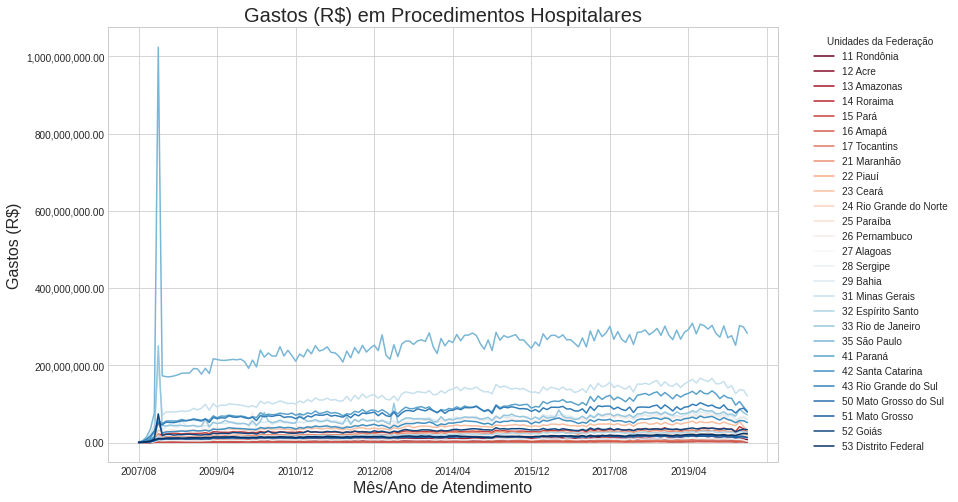

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = usaveis.T.plot(figsize=(12,8), colormap = cm.get_cmap('RdBu', len(usaveis.index)))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Unidades da Federação')
plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Mês/Ano de Atendimento', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares', fontdict = {'fontsize' : 20})

plt.show()

### Desafio 2

Adicionando a região de cada estado

In [ ]:
dados2.head()

,Unidade da Federação,1992/03,1992/04,1993/05,1993/12,1994/01,1994/02,1994/05,1994/08,1994/11,1995/01,1995/03,1995/06,1995/08,1995/12,1996/02,1996/03,1996/08,1996/12,1997/02,1997/11,1998/02,1998/03,1998/07,1998/08,1998/09,1998/10,1998/12,1999/02,1999/03,1999/05,1999/07,1999/08,1999/09,1999/10,1999/11,1999/12,2000/01,2000/02,2000/03,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,Total
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63
2,13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [ ]:
def get_usaveis(dados):
    colunas_usaveis = dados.dropna(axis = 1).mean().index.tolist()
    colunas_usaveis.insert(0, "Unidade da Federação")
    colunas_usaveis.insert(len(colunas_usaveis), "Região")

    usaveis = dados[colunas_usaveis]
    usaveis = usaveis.set_index("Unidade da Federação")
    
    return usaveis

In [ ]:
regioes = {
    '1': 'Norte',
    '2': 'Nordeste',
    '3': 'Sudeste',
    '4': 'Sul',
    '5': 'Centro-Oeste'
}
def get_regiao(row):
    return regioes.get(row['Unidade da Federação'][0])

dados2['Região'] = dados2.apply(get_regiao, axis=1)
dados2.head()

,Unidade da Federação,1992/03,1992/04,1993/05,1993/12,1994/01,1994/02,1994/05,1994/08,1994/11,1995/01,1995/03,1995/06,1995/08,1995/12,1996/02,1996/03,1996/08,1996/12,1997/02,1997/11,1998/02,1998/03,1998/07,1998/08,1998/09,1998/10,1998/12,1999/02,1999/03,1999/05,1999/07,1999/08,1999/09,1999/10,1999/11,1999/12,2000/01,2000/02,2000/03,...,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,Total,Região
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72,Norte
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63,Norte
2,13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23,Norte
3,14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18,Norte
4,15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71,Norte


### Desafio 3

In [ ]:
usaveis = get_usaveis(dados2)
ordenado_por_total = get_ordenados(usaveis)

In [ ]:
fig = ordenado_por_total.head().T.plot(backend="plotly")

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

### Desafio 4

In [ ]:
usaveis.head()

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19

In [ ]:
df = pd.DataFrame(usaveis.drop('Total', axis=1).loc['53 Distrito Federal'])
df = df.T.iloc[:,7:]
df

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
53 Distrito Federal,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,12474757.39,14611655.44,13510243.87,15156900.72,14830081.29,15039803.35,14533593.49,...,15531998.60,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,Centro-Oeste


In [ ]:
top_5 = ordenado_por_total.head()
top_5

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,236807488.84,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,74994292.81,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,6511

In [ ]:
new = pd.concat([top_5, df], axis = 0)
new

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,236807488.84,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,74994292.81,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.3

In [ ]:
fig = new.T.plot(backend="plotly")

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    legend_title_text='UFs Top 5 e DF',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

### Desafios 5 e 6

estados do sudeste + df

In [ ]:
usaveis.head()

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19

In [ ]:
sudeste = usaveis[usaveis['Região'] == 'Sudeste'].drop('Total', axis=1)
sudeste = sudeste.iloc[:,7:]
sudeste

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
32 Espírito Santo,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,15459495.21,16030031.21,15811419.60,17702137.74,16397384.20,17707422.11,17618976.32,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,Sudeste
33 Rio de Janeiro,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,50891328.43,74005618.29,61109436.88,55320998.84,55806371.23,59071370.86,55205971.21,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,Sudeste
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,2160565

In [ ]:
new = pd.concat([sudeste, df], axis = 0)
new

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
32 Espírito Santo,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,15459495.21,16030031.21,15811419.60,17702137.74,16397384.20,17707422.11,17618976.32,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,Sudeste
33 Rio de Janeiro,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,50891328.43,74005618.29,61109436.88,55320998.84,55806371.23,59071370.86,55205971.21,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,Sudeste
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,22393

In [ ]:
fig = new.T.plot(backend="plotly")

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    legend_title_text='Estados do Sudeste e DF',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

# Parte 04 - Análise de gráficos e criação de hipóteses

In [ ]:
usaveis = get_usaveis(dados2)
ordenado_por_total = get_ordenados(usaveis)
ordenado_por_total.head()

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,236807488.84,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,74994292.81,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,6511

In [ ]:
usaveis = get_usaveis(dados2)
ordenado_por_total = get_ordenados(usaveis)
ordenado_por_total = ordenado_por_total.drop('Região', axis = 1) / 1000000

meses_filtrados = ordenado_por_total.columns[47:150]
ordenado_por_total[meses_filtrados].head(3).T.plot(backend="plotly")

In [ ]:
fig = ordenado_por_total[meses_filtrados].head(3).T.plot(backend="plotly")
fig.update_yaxes(range=[0, 350])

In [ ]:
fig = ordenado_por_total[meses_filtrados].head(3).T.plot(backend="plotly")
fig.update_yaxes(range=[100, 350])

# Parte 05 - Manipulação e interpretação de gráficos

In [ ]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/07'

In [ ]:
gastos_mes_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_mes_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/07, dtype: float64

In [ ]:
gastos_mes_mais_recente.plot(backend="plotly")

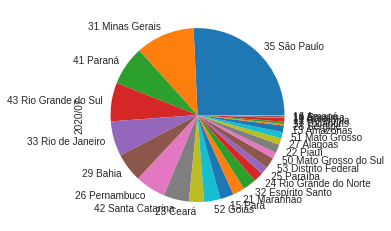

In [ ]:
gastos_mes_mais_recente.plot(kind='pie')

Horrores da pizza atual:

- legenda está horrível
- número de fatias inacreditável

Já estamos com uma vantagem:
- o gráfico já veio ordenado

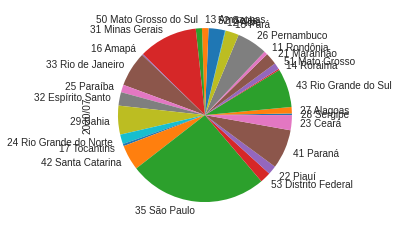

In [ ]:
gastos_mes_mais_recente.sample(frac=1).plot(kind='pie')

Horrores da pizza atual:

- legenda está horrível
- número de fatias inacreditável
- não dá para saber a ordem
- cores repetidas
- muito ruim para definir ordem
- péssimo para COMPARAR

In [ ]:
# visualização simples para valor absoluto
gastos_mes_mais_recente

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
29 Bahia                  58.90
26 Pernambuco             62.33
42 Santa Catarina         51.76
23 Ceará                  30.81
52 Goiás                  33.50
15 Pará                   27.62
21 Maranhão               24.37
32 Espírito Santo         27.46
24 Rio Grande do Norte    19.59
25 Paraíba                15.49
53 Distrito Federal       22.23
50 Mato Grosso do Sul     12.51
22 Piauí                  18.02
27 Alagoas                13.09
51 Mato Grosso            13.08
13 Amazonas               13.36
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
12 Acre                    1.16
14 Roraima                 2.74
16 Amapá                   2.16
Name: 2020/07, dtype: float64

In [ ]:
gastos_mes_mais_recente / gastos_mes_mais_recente.loc['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/07, dtype: float64

In [ ]:
(gastos_mes_mais_recente / gastos_mes_mais_recente.loc['33 Rio de Janeiro']).head()

Unidade da Federação
35 São Paulo           3.95
31 Minas Gerais        1.68
41 Paraná              1.12
43 Rio Grande do Sul   1.10
33 Rio de Janeiro      1.00
Name: 2020/07, dtype: float64

In [ ]:
gastos_mes_mais_recente.plot(kind='bar', backend='plotly')

In [ ]:
gastos_mes_mais_recente = gastos_mes_mais_recente.sort_values(ascending=False)
gastos_mes_mais_recente.plot(kind='bar', backend='plotly')

## Desafios

* Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

* Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

* Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

## Desafio 1

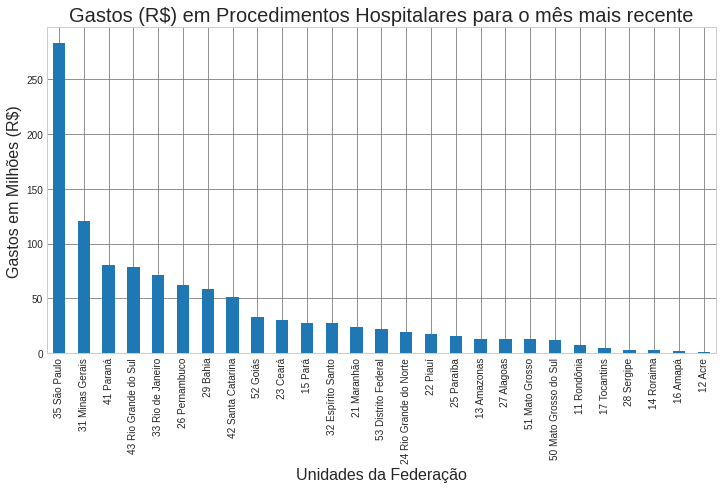

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = gastos_mes_mais_recente.plot(kind='bar', figsize = (12,6))

plt.ylabel('Gastos em Milhões (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Unidades da Federação', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares para o mês mais recente', fontdict = {'fontsize' : 20})
plt.grid(b=True, which='major', color='#777777', linestyle='-')

plt.show()

## Desafio 2

In [ ]:
print('Gastos por Estado comparando com o DF')
comparativo = (gastos_mes_mais_recente / gastos_mes_mais_recente.loc['53 Distrito Federal'])
comparativo

Gastos por Estado comparando com o DF


Unidade da Federação
35 São Paulo             12.72
31 Minas Gerais           5.42
41 Paraná                 3.61
43 Rio Grande do Sul      3.55
33 Rio de Janeiro         3.22
26 Pernambuco             2.80
29 Bahia                  2.65
42 Santa Catarina         2.33
52 Goiás                  1.51
23 Ceará                  1.39
15 Pará                   1.24
32 Espírito Santo         1.24
21 Maranhão               1.10
53 Distrito Federal       1.00
24 Rio Grande do Norte    0.88
22 Piauí                  0.81
25 Paraíba                0.70
13 Amazonas               0.60
27 Alagoas                0.59
51 Mato Grosso            0.59
50 Mato Grosso do Sul     0.56
11 Rondônia               0.33
17 Tocantins              0.20
28 Sergipe                0.15
14 Roraima                0.12
16 Amapá                  0.10
12 Acre                   0.05
Name: 2020/07, dtype: float64

In [ ]:
comparativo.index.name

'Unidade da Federação'

In [ ]:
to_chart = pd.DataFrame(comparativo.sort_values(ascending=False))

def get_color(dados):
    colors = []
    if dados.index.name == 'Unidade da Federação':
        dados = dados.reset_index()
    for uf in dados['Unidade da Federação']:
        if uf == '53 Distrito Federal':
            colors.append('r')
        else:
            colors.append('b')
    return colors

to_chart['Cor'] = get_color(to_chart)

In [ ]:
fig = to_chart.plot(kind='bar', backend='plotly', orientation='h', color='Cor')

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Gastos comparados com o DF (%)',
    yaxis_title_text = 'Unidades da Federação',
    template = 'plotly_white',
    yaxis = {
        'categoryorder': 'total ascending'
    },
    showlegend=False,
    autosize = False,
    width = 800,
    height = 700
)

## Desafio 3

In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
populacao_por_uf = pd.read_html(url)[0].iloc[:,1:3]
populacao_por_uf.set_index('Unidade federativa', inplace=True)

populacao_por_uf = populacao_por_uf.to_dict()['População']
populacao_por_uf

{'Acre': '894 470',
 'Alagoas': '3 351 543',
 'Amapá': '861 773',
 'Amazonas': '4 228 381',
 'Bahia': '14 930 634',
 'Ceará': '9 187 103',
 'Distrito Federal': '3 055 149',
 'Espírito Santo': '4 064 052',
 'Goiás': '7 142 070',
 'Maranhão': '7 127 460',
 'Mato Grosso': '3 526 220',
 'Mato Grosso do Sul': '2 809 394',
 'Minas Gerais': '21 331 292',
 'Paraná': '11 516 840',
 'Paraíba': '4 039 277',
 'Pará': '8 690 745',
 'Pernambuco': '9 616 621',
 'Piauí': '3 281 480',
 'Rio Grande do Norte': '3 534 165',
 'Rio Grande do Sul': '11 422 973',
 'Rio de Janeiro': '17 366 189',
 'Rondônia': '1 796 460',
 'Roraima': '631 181',
 'Santa Catarina': '7 279 638',
 'Sergipe': '2 318 822',
 'São Paulo': '46 289 333',
 'Tocantins': '1 590 248'}

In [ ]:
def get_populacao(row):
    uf = row['Unidade da Federação'][3:]
    return int(populacao_por_uf[uf].replace(' ',''))

usaveis = get_usaveis(dados2)
ordenados = get_ordenados(usaveis)
ordenados = ordenados.reset_index()
ordenados['População'] = aux.apply(get_populacao, axis=1)
ordenados.head()

,Unidade da Federação,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região,População
0,35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste,46289333
1,31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste,21331292
2,41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul,11516840
3,43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,5

In [ ]:
ordenados['Total'] = ordenados.sum(axis=1)
ordenados['Proporcional'] = ordenados['Total']  / ordenados['População'] 
ordenados.head()

,Unidade da Federação,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,...,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região,População,Total,Proporcional
0,35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste,46289333,37496575800.41,810.05
1,31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste,21331292,18768207204.40,879.84
2,41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul,11516840,13603301780.36,1181.17
3,43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964528.

In [ ]:
ordenados['Cor'] = get_color(ordenados)
fig = ordenados.plot(kind='bar',
                     x = 'Proporcional',
                     y = 'Unidade da Federação',
                     color = 'Cor',
                     backend='plotly',
                     orientation='h')

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por Habitante para cada UF',
    xaxis_title_text = 'Gastos por Habitante (R$)',
    yaxis_title_text = 'Unidades da Federação',
    template = 'plotly_white',    
    showlegend=False,
    yaxis = {
        'categoryorder': 'total ascending'
    },
    autosize = False,
    width = 600,
    height = 600
)